In [19]:
from osgeo import gdal
import rasterio
import numpy as np

In [20]:
import matplotlib.pyplot as plt

In [32]:
#input the file
filename = r"C:\Users\RAMBABU\Geopandas\landsat8.tiff"

In [33]:

dataset = rasterio.open(filename)
print (dataset)
Crs = dataset.crs
trans = dataset.transform
cols = dataset.width
rows = dataset.height
bands= dataset.count
print(cols,rows,bands)

<open DatasetReader name='C:/Users/RAMBABU/Geopandas/landsat8.tiff' mode='r'>
7781 7931 12


In [34]:
with rasterio.open(filename) as r:
    raster_matrix_image= r.read()

In [31]:
raster_matrix_image

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [36]:
nir = raster_matrix_image[4,:,:]
red = raster_matrix_image[3,:,:]

In [39]:
dinom = nir+red
numer = nir-red
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [40]:
ndvi = np.where(dinom==0.0, 0.0, numer/dinom)

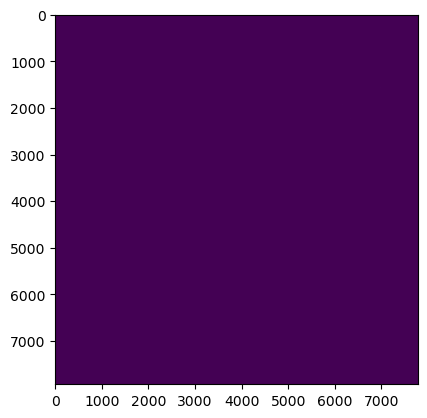

In [41]:
plt.figure()
plt.imshow(ndvi)

In [42]:
ndvi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
np.amin(nir.flatten())

0

In [44]:
red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [50]:
out_meta = dataset.meta.copy()

out_meta.update({'driver':'GTiff',
                 'width':dataset.shape[1],
                 'height':dataset.shape[0],
                 'count':1,
                 'dtype':'float64',
                 'crs':dataset.crs, 
                 'transform':dataset.transform,
                 'nodata':0})

In [52]:

with rasterio.open(fp=r'ndvi1.tif', #outputpath_name
             mode='w',**out_meta) as dst:
             dst.write(ndvi, 1) # the numer one is the number of bands

with rasterio.open(fp=r'ndvi1.tif', # outputpath_name
             mode='w',**out_meta) as dst:
             dst.write_band(1,ndvi) # the numer one is the number of bands